In [36]:
from __future__ import print_function, division
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
img = cv2.imread('/home/swagatam/cpp_test/wwsIP/practice/assignment4/IMG_6479.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img / 255
img_rgb1 = img_rgb.copy()
img_rgb = img_rgb / 255
m, n, c = img.shape
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb_array = np.array([img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]]).reshape(c, m*n)

In [3]:
print(img.shape)
print(img_rgb.shape)
print(rgb_array.shape)
r = rgb_array.transpose()
print(r.shape)

(384, 512, 3)
(384, 512, 3)
(3, 196608)
(196608, 3)


In [4]:
print(r[0])
print(r[1])
print(r[100])
print(r[12*n + 23])
print(r[196607])

[0.36470588 0.39215686 0.25882353]
[0.33333333 0.36078431 0.22745098]
[0.35294118 0.40392157 0.22352941]
[0.33333333 0.32941176 0.20784314]
[0.50588235 0.27843137 0.18431373]


In [5]:
img_rgb[0][0]

array([0.36470588, 0.39215686, 0.25882353])

In [6]:
img_rgb[0][0]
print(img_rgb[0][1])
print(img_rgb[0][100])
print(img_rgb[12][23])
print(img_rgb[m-1][n-1])

[0.33333333 0.36078431 0.22745098]
[0.35294118 0.40392157 0.22352941]
[0.33333333 0.32941176 0.20784314]
[0.50588235 0.27843137 0.18431373]


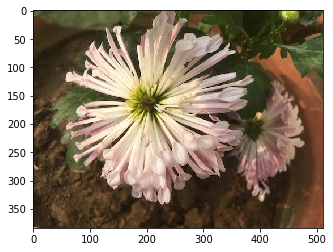

In [7]:
plt.imshow(img_rgb, cmap = 'gray')

In [8]:
rgb_to_xyz = np.array([
    [0.6067, 0.1736, 0.2001],
    [0.2988, 0.5868, 0.1143],
    [0.0000, 0.0661, 1.1149]
])

In [9]:
xyz_array = np.matmul(rgb_to_xyz, rgb_array)
print(xyz_array.shape)
print(xyz_array.transpose()[0])
xyz_array = xyz_array.transpose()
print(xyz_array.shape)
print(xyz_array[0])
print(xyz_array[0][0])
print(xyz_array[0][1])
for i in range(xyz_array.shape[0]):
    summ = np.sum(xyz_array[i])
    xyz_array[i][0] /= summ
    xyz_array[i][1] /= summ
print(xyz_array[0])
xyz_array = xyz_array.transpose()[:-1,:]
print(xyz_array.shape)
print(xyz_array.transpose()[0])

(3, 196608)
[0.34113608 0.36867529 0.31448392]
(196608, 3)
[0.34113608 0.36867529 0.31448392]
0.34113607843137256
0.36867529411764705
[0.33304466 0.35993067 0.31448392]
(2, 196608)
[0.33304466 0.35993067]


In [ ]:
# Input to this is an RGB image (numpy array)
def img_to_rgb_matrix(img_rgb):
    
    m, n, c = img_rgb.shape
    img_rgb = img_rgb / 255
    # rgb_array is of shape 3 x no. of pixels and stores [R, G, B] value in each column
    rgb_array = np.array([img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]]).reshape(c, m*n)
    
    return rgb_array
    

In [ ]:
# Input to this is a 3 x num_pixels shaped 2D matrix
def rgb_to_xyz(rgb_array):
    
    conv_mat = np.array([
        [0.6067, 0.1736, 0.2001],
        [0.2988, 0.5868, 0.1143],
        [0.0000, 0.0661, 1.1149]
    ])
    
    xyz_array = np.matmul(conv_mat, rgb_array)
    
    return xyz_array

In [ ]:
# Takes an img which is read by opencv that is BGR, may be after cropping
# as required
def get_2D_chromatics(img):
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    rgb_array = img_to_rgb_matrix(img_rgb)
    xyz_array = rgb_to_xyz(rgb_array)
    
    xyz_array = xyz_array.transpose() #makes it [numpixels x 3] shaped
    for i in range(xyz_array.shape[0]):
        summ = np.sum(xyz_array[i])
        xyz_array[i][0] /= summ
        xyz_array[i][1] /= summ
    xy_array = xyz_array.transpose()[:-1,:] #It is [2 x numpixels] shaped
    
    return xy_array

In [ ]:
def get_dominant_color(img_rgb, xy_array):
    
    m, n, c = img_rgb.shape
    
    data = pd.DataFrame({
        'x': xy_array[0],
        'y': xy_array[1]
    })
    
    kmeans = Kmeans(n_clusters = 3)
    kmeans.fit(data)
    
    labels = kmeans.predict(data)
    centroids = kmeans.cluster_centers_
    
    k, counts = np.unique(labels, return_counts = True)
    mode = np.argmax(counts)
    pixels = counts[mode]
    
    indices = np.where(labels == mode)
    indices = indices[0]
    
    dom = img_rgb.copy()
    
    for i in range(len(indices)):
        x = indices[i] / n
        y = indices[i] % n
        dom[int(x), y] = np.array([255, 255, 255]) #color it white
        
    dom = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.imwrite('dominant_color.jpg', dom)
    
    return indices # To be used later for color Transfer

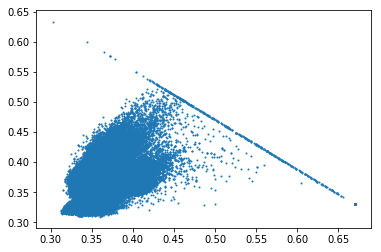

In [10]:
plt.scatter(xyz_array[0], xyz_array[1], s = 1)
plt.show()

In [37]:
df = pd.DataFrame({
    'x': xyz_array[0],
    'y': xyz_array[1]
})
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_
colmap = {1: 'r', 2: 'g', 3: 'b'}

In [13]:
labels

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

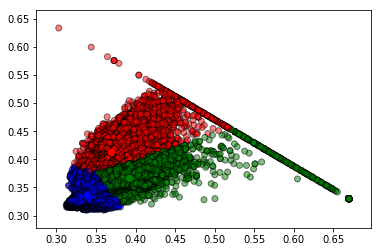

In [14]:
fig = plt.figure()

colors = map(lambda x: colmap[x+1], labels)

plt.scatter(df['x'], df['y'], color=colors, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
# plt.xlim(0, 80)
# plt.ylim(0, 80)
plt.show()

In [15]:
k, counts = np.unique(labels, return_counts = True)

In [16]:
k

array([0, 1, 2], dtype=int32)

In [17]:
counts

array([20451, 80474, 95683])

In [18]:
mode = np.argmax(counts)
pixels = counts[mode]
print(mode, pixels)

2 95683


In [19]:
indices = np.where(labels == mode)
indices = indices[0]
print(indices.shape)
print(indices[394])

(95683,)
650


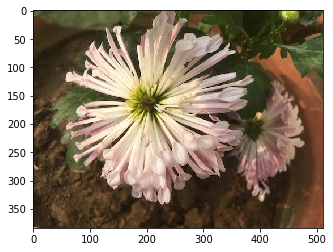

In [23]:
plt.imshow(img_rgb, cmap = 'gray')

In [24]:
dominant = img_rgb1
for i in range(len(indices)):
    x = indices[i] / n
    y = indices[i] % n
    dominant[int(x), y] = np.array([255, 255, 255])

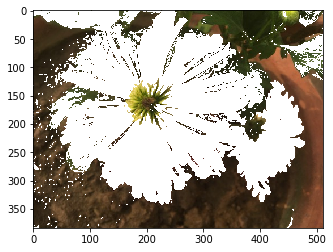

In [25]:
plt.imshow(img_rgb1, cmap = 'gray')
plt.imsave('mode2.png',img_rgb1, cmap = 'gray')

In [29]:
# Input to this is an RGB image (numpy array)
def img_to_rgb_matrix(img_rgb):
    
    m, n, c = img_rgb.shape
    img_rgb = img_rgb / 255
    # rgb_array is of shape 3 x no. of pixels and stores [R, G, B] value in each column
    rgb_array = np.array([img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]]).reshape(c, m*n)
    
    return rgb_array

In [30]:
# Input to this is a 3 x num_pixels shaped 2D matrix
def rgb_to_xyz(rgb_array):
    
    conv_mat = np.array([
        [0.6067, 0.1736, 0.2001],
        [0.2988, 0.5868, 0.1143],
        [0.0000, 0.0661, 1.1149]
    ])
    
    xyz_array = np.matmul(conv_mat, rgb_array)
    
    return xyz_array

In [31]:
# Takes an img which is read by opencv that is BGR, may be after cropping
# as required
def get_2D_chromatics(img):
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    rgb_array = img_to_rgb_matrix(img_rgb)
    xyz_array = rgb_to_xyz(rgb_array)
    
    xyz_array = xyz_array.transpose() #makes it [numpixels x 3] shaped
    for i in range(xyz_array.shape[0]):
        summ = np.sum(xyz_array[i])
        xyz_array[i][0] /= summ
        xyz_array[i][1] /= summ
    xy_array = xyz_array.transpose()[:-1,:] #It is [2 x numpixels] shaped
    
    return xy_array

In [40]:
def get_dominant_color(img_rgb, xy_array):
    
    m, n, c = img_rgb.shape
    
    data = pd.DataFrame({
        'x': xy_array[0],
        'y': xy_array[1]
    })
    
    kmeans = KMeans(n_clusters = 3)
    kmeans.fit(data)
    
    labels = kmeans.predict(data)
    centroids = kmeans.cluster_centers_
    
    k, counts = np.unique(labels, return_counts = True)
    mode = np.argmax(counts)
    pixels = counts[mode]
    
    indices = np.where(labels == mode)
    indices = indices[0]
    inds = []
    
    dom = img_rgb.copy()
    
    for i in range(len(indices)):
        x = indices[i] / n
        y = indices[i] % n
        dom[int(x), y] = np.array([255, 255, 255]) #color it white
        inds.append((int(x), y))
        
    dom = cv2.cvtColor(dom, cv2.COLOR_RGB2BGR)
    cv2.imwrite('dominant_color.jpg', dom)
    
    return inds # To be used later for color Transfer

In [55]:
img = cv2.imread('/home/swagatam/cpp_test/wwsIP/practice/assignment4/IMG_6479.jpg')
# img = img[50:300, 100:350]
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

xy_array = get_2D_chromatics(img)
pixels = get_dominant_color(img_rgb, xy_array)

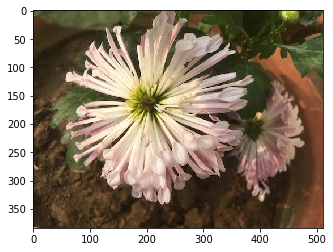

In [56]:
plt.imshow(img_rgb, cmap = 'gray')

In [57]:
img_cropped = img[0:340, 50:400]

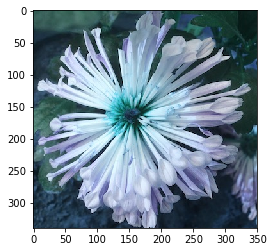

In [58]:
plt.imshow(img_cropped, cmap = 'gray')